In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('Clean_AirbnbData.csv')

df.head(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,amenities_count,host_experience_days
0,within a few hours,1.0,0.69,True,2.0,True,True,Dovercourt-Wallace Emerson-Junction,43.66434,-79.42496,...,4.96,4.91,4.94,4.89,4.89,4.77,False,0.95,31,1371.0
1,no response,0.0,0.00,False,1.0,True,True,Waterfront Communities-The Island,43.64698,-79.39121,...,5.00,5.00,5.00,5.00,5.00,5.00,False,0.04,16,2151.0
2,no response,0.0,0.00,False,1.0,True,False,Playter Estates-Danforth,43.67943,-79.34853,...,5.00,5.00,5.00,5.00,5.00,4.75,False,0.08,12,2971.0
3,no response,0.0,0.00,False,4.0,True,True,High Park North,43.65953,-79.45416,...,4.38,4.63,4.50,4.88,5.00,4.75,True,0.19,22,3509.0
4,within an hour,1.0,0.91,False,70.0,True,True,Waterfront Communities-The Island,43.64126,-79.38277,...,5.00,4.95,4.95,5.00,4.85,4.85,False,0.42,33,3236.0


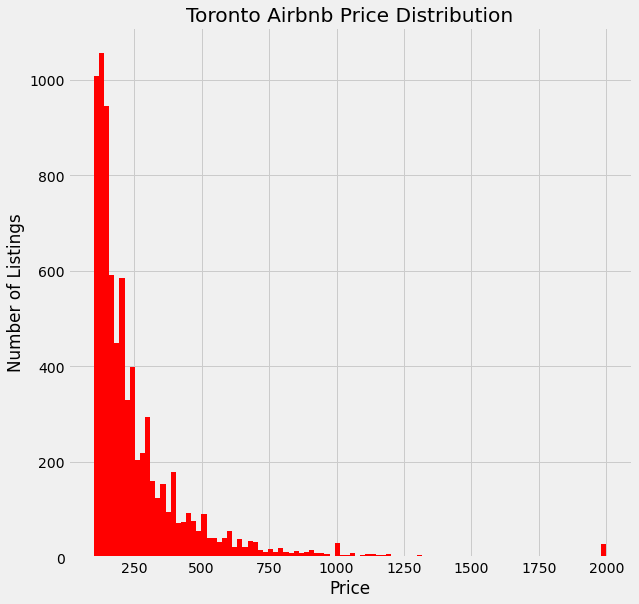

In [21]:
plt.figure(figsize=(9,8))
plt.hist(df["price"],bins =100, range=[100, 2000], facecolor='red', align='mid')
plt.title("Toronto Airbnb Price Distribution")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()

<AxesSubplot:>

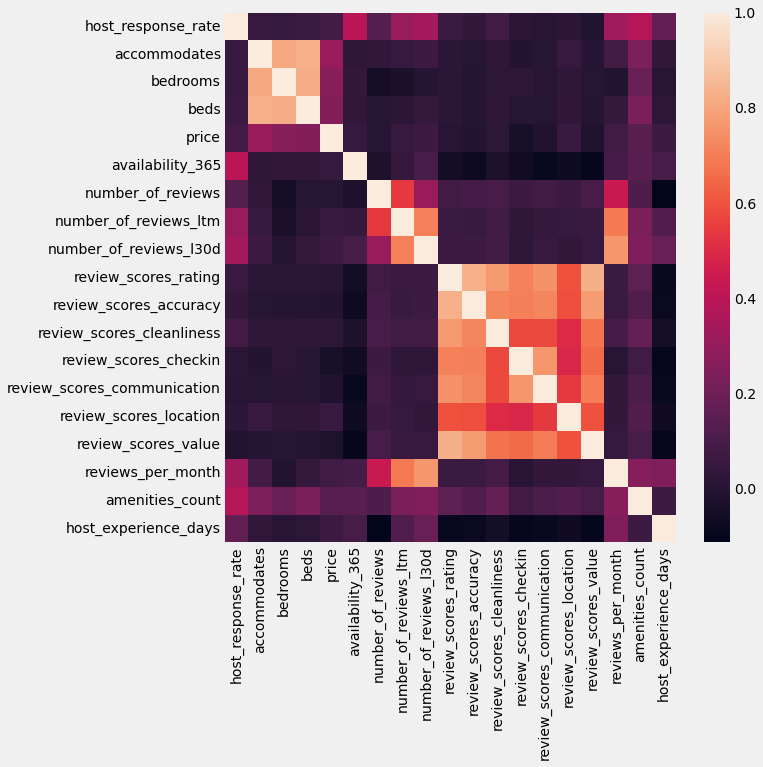

In [22]:
stats_df = df.drop(["host_response_time","availability_30","availability_60","availability_90","host_acceptance_rate","host_total_listings_count","maximum_nights","minimum_nights","host_is_superhost","host_has_profile_pic","host_identity_verified","neighbourhood_cleansed","latitude","longitude","property_type","room_type","instant_bookable"], axis=1)
corr = stats_df.corr()

# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)

In [23]:

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (0.75, 1.00, 0.75), (200, 3))

# plot:


0.22496001780728214


Text(0.5, 1.0, 'Significance Level x p-value')

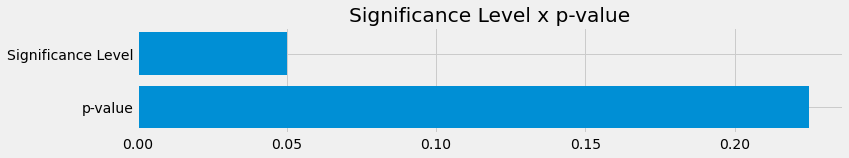

In [24]:
# create two samples with 1000 samples each
superhost = df[df['host_is_superhost'] == True]['price'].sample(1000)
non_superhost = df[df['host_is_superhost'] == False]['price'].sample(1000)

# With the samples, conduct a t test and calculate the p value
from scipy.stats import ttest_rel
pvalue = ttest_rel(superhost, non_superhost)[1]

print(pvalue)
fig = plt.figure(figsize = (10,1.5))
plt.barh(y = ['p-value', 'Significance Level'], width = [pvalue, 0.05])
plt.title('Significance Level x p-value')


In [25]:
df2 = df[['latitude', 'longitude','price','neighbourhood_cleansed']].copy()
df2.head(5)

,latitude,longitude,price,neighbourhood_cleansed
0,43.66434,-79.42496,90.0,Dovercourt-Wallace Emerson-Junction
1,43.64698,-79.39121,130.0,Waterfront Communities-The Island
2,43.67943,-79.34853,45.0,Playter Estates-Danforth
3,43.65953,-79.45416,80.0,High Park North
4,43.64126,-79.38277,1999.0,Waterfront Communities-The Island


In [26]:
import plotly.express as px
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(df2, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="neighbourhood_cleansed", 
                        hover_data=["neighbourhood_cleansed", "price"],
                        color="price",
                        color_continuous_scale=color_scale,
                        size="price",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [27]:
categories = pd.cut(df['review_scores_value'], 4,
                   labels = ['Poor', 'Avergage', 'Good', 'Excellent'])

# The 'categories' variable data will become a new column in the DF.
df['rating_category'] = categories

Text(0.5, 1.0, 'Price by Rating')

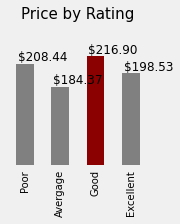

In [28]:
groups = df.groupby('rating_category')['price'].mean()

chart = groups.plot(kind = 'bar', ylim = (100,250) , xlabel = '', yticks = [], 
                    fontsize = 10, grid = False, color = ['grey','grey', 'darkred', 'grey'])

for i, price in enumerate(groups):
    plt.text(-0.2 + i, price + 3, f'${price:.2f}', fontdict = {'size':12})

plt.title('Price by Rating', fontdict = {'size':15})

/Users/abhinavbhatnagar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



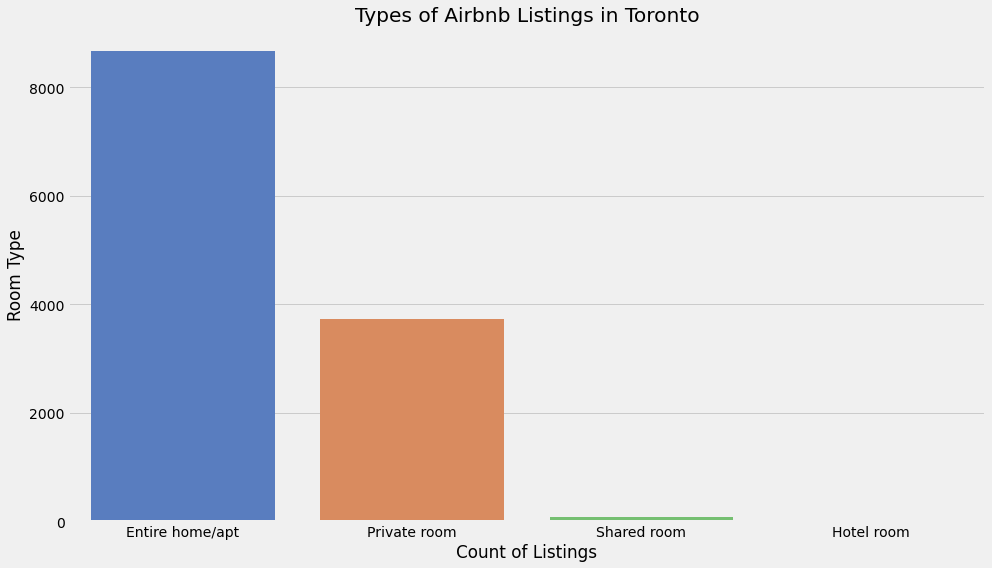

In [29]:
plt.figure(figsize=(13,7))
plt.title("Types of Airbnb Listings in Toronto")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.xlabel("Count of Listings")
plt.ylabel("Room Type")
plt.show()

In [30]:

groups = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values()

Text(0.5, 1.0, 'Average Price by Neighbourhood')

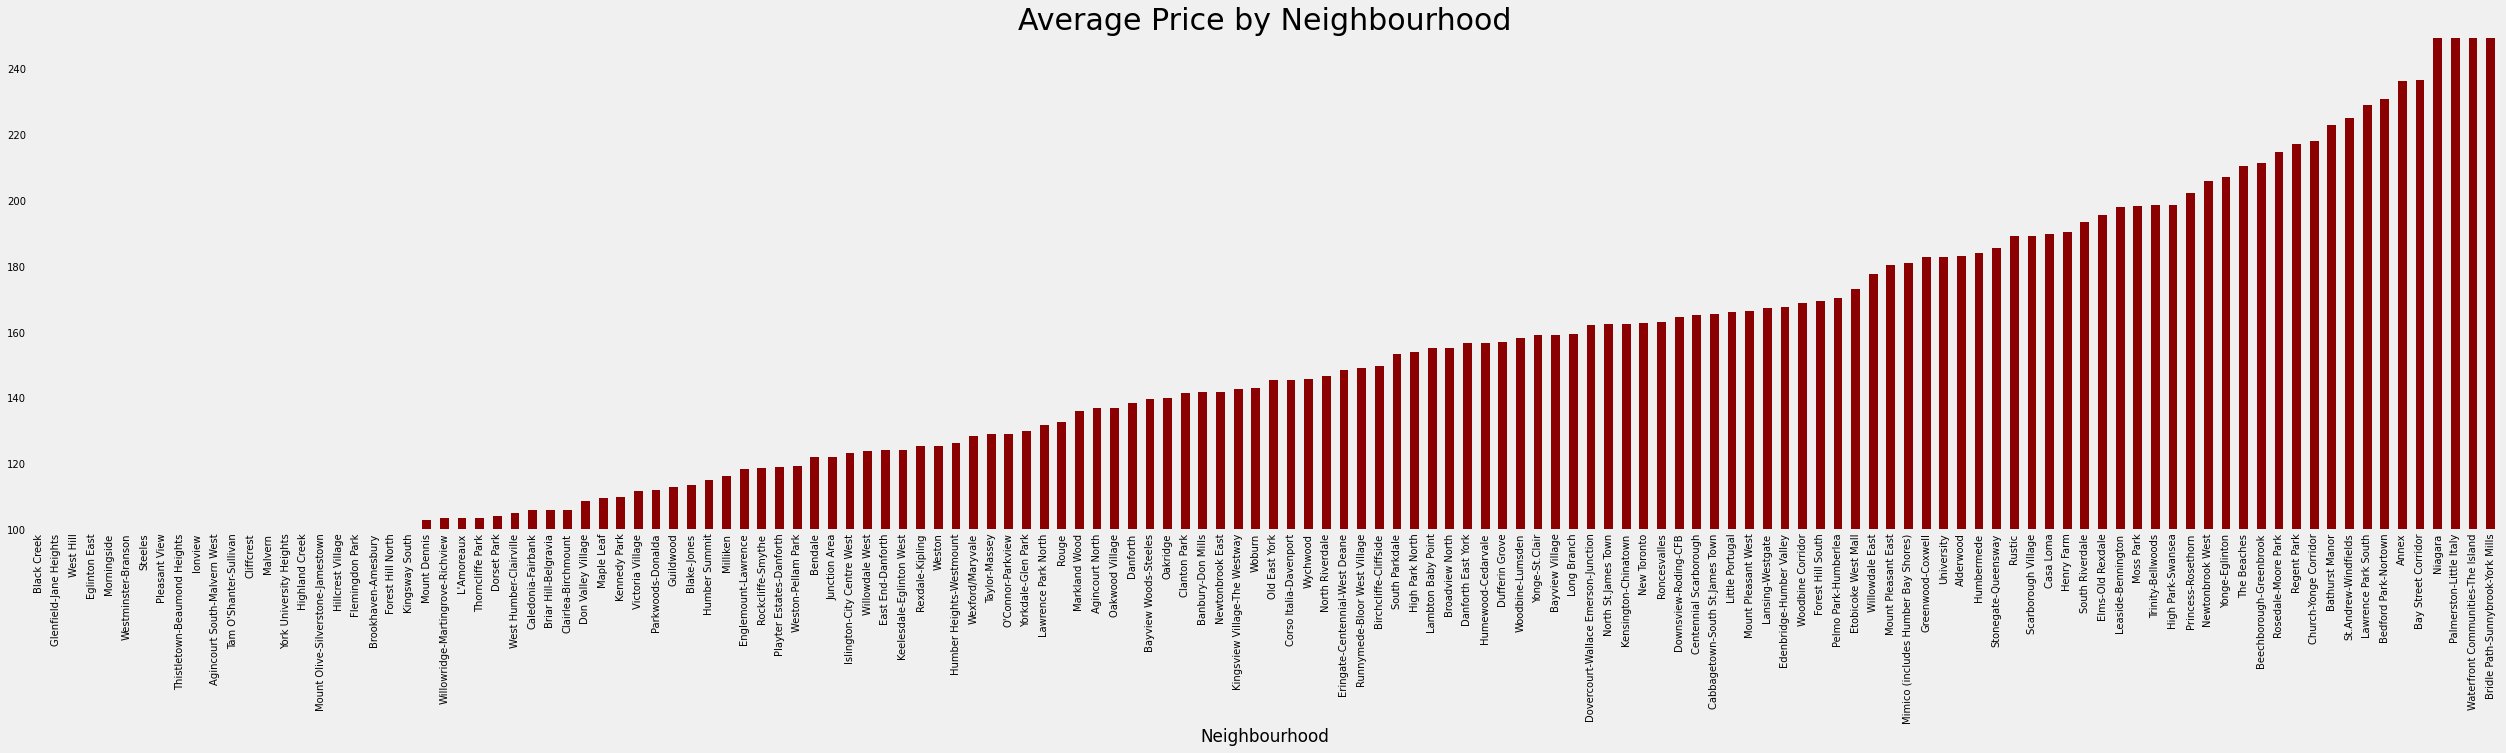

In [31]:

plt.figure(figsize=(35,7))
chart = groups.plot(kind = 'bar', ylim = (100,250) , xlabel = 'Neighbourhood', 
                    fontsize = 10, grid = False, color = ["darkred"])

plt.title('Average Price by Neighbourhood', fontdict = {'size':30})

<AxesSubplot:xlabel='amenities_count', ylabel='price'>

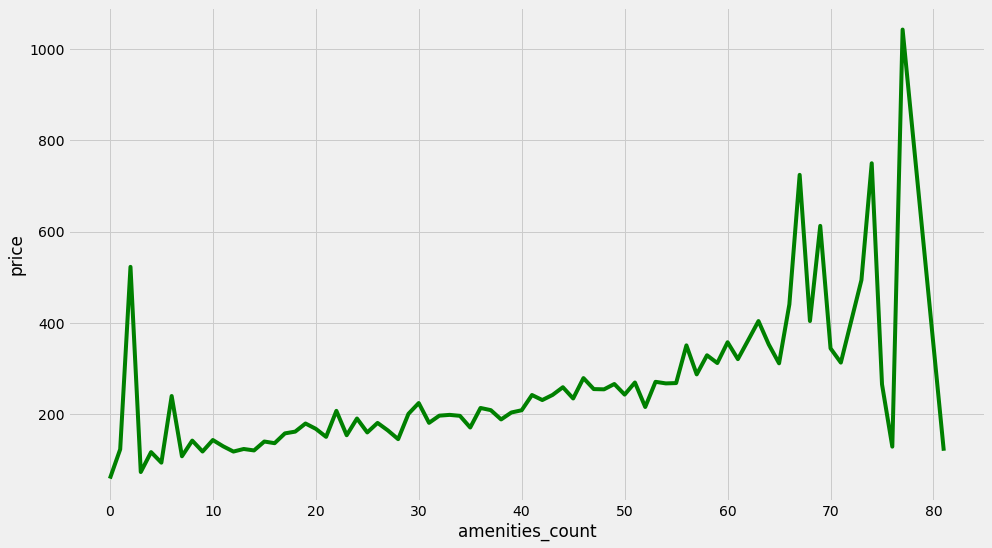

In [32]:
plt.figure(figsize = (13,7))
ax = sns.lineplot(x = 'amenities_count', y = 'price', data = df, ci = None, color = 'green')
ax